# Оптимизация методом градиентного спуска

Предлагается реализовать градиентный спуск для поиска оптимального значения $x$, минимизирующего значение функционала $l$.

$x = (x_1, x_2)$

$y = Ax + b$

$z = \sigma(y)$

$l = (z_1 - 0.1)^2 + (z_2 - 0.2)^2 + (z_3 - 0.3)^2$

$A = \begin{pmatrix} 1 & 2 \\ -1 & 0 \\ 0 & -1 \\ \end{pmatrix}$, $b = \begin{pmatrix} 1 \\ 0 \\ -1 \end{pmatrix}$

$\sigma_i(x) = \frac{1}{1 + e^{-x_i}}$.

In [30]:
import numpy as np

# Матрица A функци y(x).
A = np.array([
    [1, 2],
    [-1, 0],
    [0, -1]
])

# Вектор b функции y(x).
b = np.array([1, 0, -1])

# Целевой вектор функции l(z).
t = np.array([0.1, 0.2, 0.3])

# Начальное значение X.
X0 = np.array([-3, 4])


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f_y(x):
    return A @ x + b

def f_z(y):
    return sigmoid(y)

def f_l(z):
    return ((z - t) ** 2).sum()

### Визуализируем зависимость $l$ от $x$.

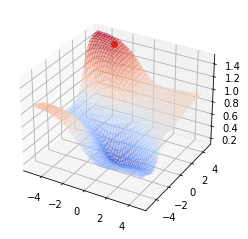

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

def show(point):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Make data.
    X1 = np.arange(-5, 5, 0.25)
    X2 = np.arange(-5, 5, 0.25)
    X1, X2 = np.meshgrid(X1, X2)
    X = np.stack([X1, X2], axis=-1)
    Z = sigmoid(X @ A.T + b)
    L = ((Z - t) ** 2).sum(axis=-1)

    ax.plot_surface(X1, X2, L, cmap=cm.coolwarm, alpha=0.4,
                    linewidth=0, antialiased=False, zorder=100)
    
    PL = ((sigmoid(A @ point + b) - t) ** 2).sum()
    ax.plot([point[0]], [point[1]], [PL], marker="o", color="r")

    plt.show()
    
show(X0)

**Задание 1.** Вычислите матрицу Якоби функции $y(x)$.

In [51]:
def A_y(x):
    return A

print(A_y(X0))
assert A_y(X0).shape == (3, 2)
assert abs(A_y(X0)[1, 0] + 1) < 1e-6

[[ 1  2]
 [-1  0]
 [ 0 -1]]


**Задание 2.** Вычислите матрицу Якоби функции $z(y)$.

In [52]:
def A_z(y):
    return np.diag(sigmoid(y) * sigmoid(-y))

print(A_z(f_y(X0)))
assert A_z(f_y(X0)).shape == (3, 3)
assert abs(A_z(f_y(X0))[1, 1] - sigmoid(3) * sigmoid(-3)) < 1e-6

[[0.00246651 0.         0.        ]
 [0.         0.04517666 0.        ]
 [0.         0.         0.00664806]]


**Задание 3.** Вычислите матрицу Якоби функции $l(z)$.

In [53]:
def A_l(z):
    return (2 * (z - t))[None]

print(A_l(f_z(f_y(X0))))
assert A_l(f_z(f_y(X0))).shape == (1, 3)
assert abs(A_l(f_z(f_y(X0)))[0, 1] - 2 * sigmoid(3) + 0.4) < 1e-6

[[ 1.79505475  1.50514825 -0.5866143 ]]


**Задание 4.** Реализуйте шаг градиентного спуска.

In [58]:
def step(x, lr=1):
    y = f_y(x)
    z = f_z(y)
    A = A_l(z) @ A_z(y) @ A_y(x)
    return x - lr * A[0]

assert np.linalg.norm(step(X0) - np.array([-2.93642995,  3.98724512])) < 1e-6

**Задание 5.** Сделайте 1000 шагов методом градиентного спуска из точки X0.

In [61]:
x = X0
for _ in range(100):
    x = step(x)
    
final_x = x

Final X: [1.37341394 3.32421511]
Final l: 0.8921153306639059


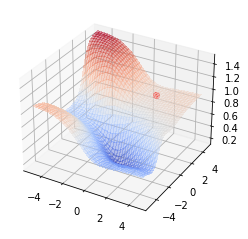

In [62]:
print("Final X:", final_x)
print("Final l:", f_l(f_z(f_y(final_x))))
show(final_x)

### Удалось ли достичь минимума функции $l$?

**Задание 6.** Что будет, если сделать 100 шагов вместо 1000?